# Computational Methods in Stochastics - Assignment 6

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### a)

In [15]:
a = 3
b = 1
l = b/a

def f(x, l):
    return l * np.exp(-l * x)

def f_inv(r, l):
    return -np.log(1 - r)/l

def x_exp_random_variates(x, l):
    samples = np.empty(x)
    for i in range (x):
        random_value = np.random.random()
        samples[i] = f_inv(random_value, l)
    return samples

def exponential(x, l):
    return l * np.exp(-l * x)

def gamma(x, a, b):
    ba = b**a
    x_pow = x**(a - 1)
    exp_term = np.exp(-b * x)
    factorial_a_minus_1 = np.math.factorial(a - 1)
    result = ba * x_pow * exp_term / factorial_a_minus_1
    return result

def plot_acceptance_ratio(start, end, step, N):
    interval  = np.arange(start, end, step)
    accs = np.empty(len(interval))
    for i, l in tqdm(enumerate(interval)):
        theta = x_exp_random_variates(1, l)
        acc = [theta]
        for j in range(N):
            phi = x_exp_random_variates(1, l)
            numerator = gamma(phi, a, b) / gamma(theta, a, b)
            denominator = exponential(phi, l) / exponential(theta, l)
            acc_prob = min(1, numerator / denominator)
            if(np.random.random() < acc_prob):
                theta = phi
                acc.append(theta)
        accs[i] = len(acc)/N
    plt.figure(figsize=(10, 6))
    plt.plot(interval, accs)
    plt.xlabel('$\lambda$')
    plt.ylabel('Acceptance ratio $\\alpha$')
    plt.title('Acceptance ratio vs $\lambda$')
    plt.grid()
    plt.show()   
    return accs


10it [00:17,  1.74s/it]


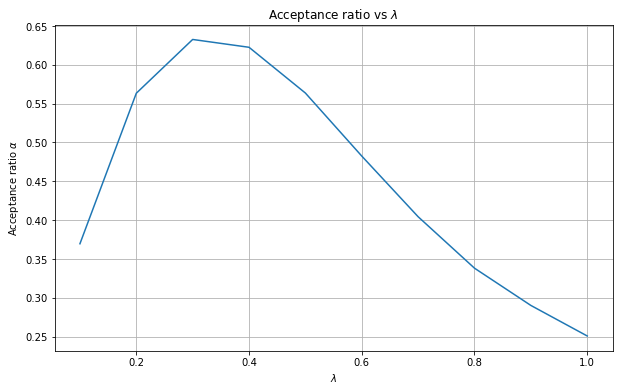

In [16]:
N = 100000 
ans1 = plot_acceptance_ratio(0.1, 1.1, 0.1, N)

7it [00:12,  1.76s/it]


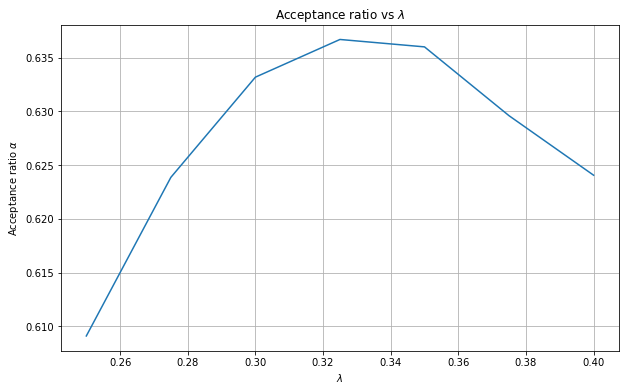

In [17]:
ans2 = plot_acceptance_ratio(0.25, 0.425, 0.025, N)

In [18]:
idx = np.argmax(ans2)
lambdas = np.arange(0.25, 0.425, 0.025)
print(f"The value of the optimal lambda is: {lambdas[idx]} ± 0.05")

The value of the optimal lambda is: 0.32500000000000007 ± 0.05


### b)

100%|██████████| 1000000/1000000 [00:16<00:00, 60222.60it/s]


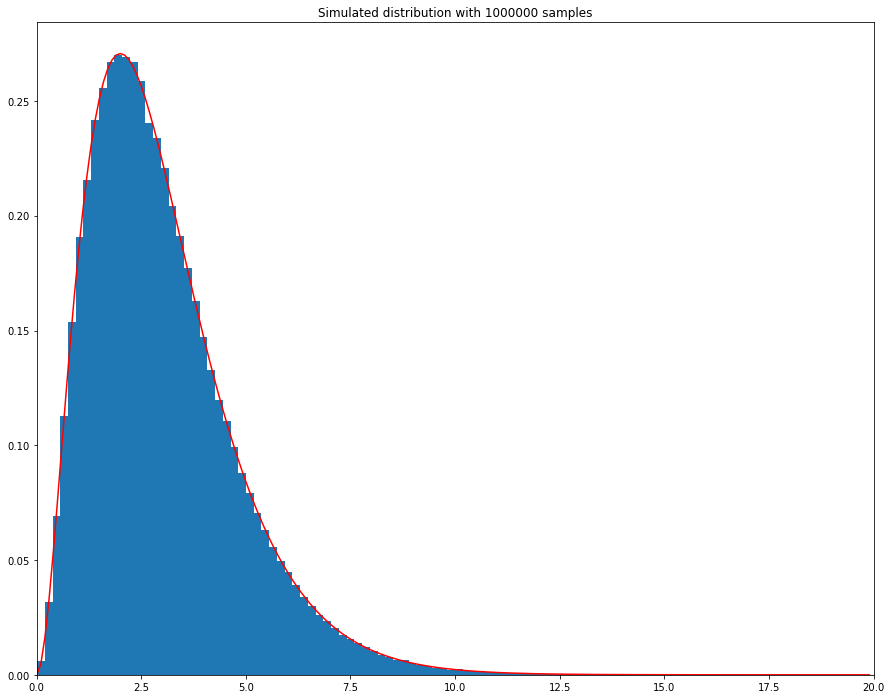

In [19]:
N = 10**6
theta = x_exp_random_variates(1, l)
acc = [theta]
for i in tqdm(range(N)):
    phi = x_exp_random_variates(1, l)
    numerator = gamma(phi, a, b) / gamma(theta, a, b)
    denominator = exponential(phi, l) / exponential(theta, l)
    acc_prob = min(1, numerator / denominator)
    if(np.random.random() < acc_prob):
        theta = phi
    acc.append(theta)

interval = np.arange(0,20,0.1)
plt.figure(figsize=(15, 12))
plt.hist(np.asarray(acc), bins = 100, density = True)
plt.plot(interval, gamma(interval, a, b), color = "red")
plt.title("Simulated distribution with " + str(N) + " samples")
plt.xlim(0,20)
plt.show()

### c)

In [20]:
mean_acc = np.mean(acc)
variance_acc = np.var(acc)

beta = mean_acc / variance_acc
alpha = beta * mean_acc

print(f"Mean = {mean_acc:.4f}")
print(f"Variance = {variance_acc:.4f}")
print(f"Simulated alpha = {alpha:.4f}")
print(f"Simulated beta = {beta:.4f}")

Mean = 2.9987
Variance = 2.9923
Simulated alpha = 3.0052
Simulated beta = 1.0021


### d)

The Gibbs Sampler algorithm requires the ability to simulate random variables from conditional distributions, along with one of the marginals. Conversely, the Metropolis-Hastings algorithm does not have this specific requirement, as it involves simulating random variables from a proposal distribution. While the choice of the proposal distribution is critical for the efficiency of the Metropolis-Hastings algorithm, it theoretically allows for the use of various distributions. This is why the Metropolis-Hastings algorithm is generally considered more versatile compared to the Gibbs Sampler.